In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

218 232 125 142
Center:  (171.5, 187.0)
xmin e ymin:   (125, 142)


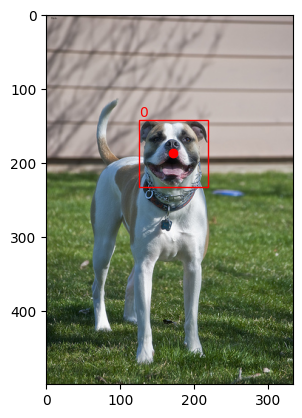

In [19]:
# Carregar a imagem
image_path = '../datasets/oxford-iiit-pet/teste/images/american_bulldog_139.jpg'
image = np.array(Image.open(image_path))

# Carregar os dados da bounding box do arquivo de texto
bbox_data_path = '../datasets/oxford-iiit-pet/teste/labels/american_bulldog_139.txt'
with open(bbox_data_path, 'r') as file:
    bbox_data = file.readlines()

# Exibir a imagem
fig, ax = plt.subplots(1)
ax.imshow(image)

# Adicionar cada bounding box à imagem
for line in bbox_data:
    parts = line.strip().split(' ')
    classe, xmax, ymax, xmin, ymin = parts
    print(xmax, ymax, xmin, ymin)
    xmax, ymax, xmin, ymin = map(int, [xmax, ymax, xmin, ymin])
    width = xmax - xmin
    height = ymax - ymin
    # Calcular o centro da bounding box
    center_x = (xmin + xmax) / 2
    center_y = (ymin + ymax) / 2
    print("Center: " , (center_x,center_y))
    print("xmin e ymin:  ", (xmin, ymin))
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.plot(center_x, center_y, "ro")
    ax.add_patch(rect)
    ax.text(xmin, ymin - 5, classe, color='r')

plt.show()

In [14]:
import os

In [15]:
diretorio_saida = "../datasets/oxford-iiit-pet/teste/annotations"
arquivo_entrada = "../datasets/oxford-iiit-pet/teste/labels"

In [20]:
# Garantir que o diretório de saída exista
os.makedirs(diretorio_saida, exist_ok=True)

# Listar os arquivos de entrada
arquivos_txt = os.listdir(arquivo_entrada)

for arquivo_txt in arquivos_txt:
    # Construir caminho completo para o arquivo de imagem correspondente
    nome_arquivo = os.path.splitext(arquivo_txt)[0]

    # Abrir arquivo de entrada e criar arquivo de saída
    with open(os.path.join(arquivo_entrada, arquivo_txt), 'r') as f_in, \
            open(os.path.join(diretorio_saida, arquivo_txt), 'w') as f_out:
        for linha in f_in:
            dados = linha.strip().split()  # Ler dados do arquivo de entrada
            classe = dados[0]
            xmax, ymax, xmin, ymin = map(float, dados[1:])  # Coordenadas da caixa delimitadora

            # Calcular coordenadas x_center, y_center, width, height normalizadas
            width = xmax - xmin
            height = ymax - ymin
            # Calcular o centro da bounding box
            center_x = (xmin + xmax) / 2
            center_y = (ymin + ymax) / 2

            # Escrever dados no formato especificado no arquivo de saída
            f_out.write(f"{classe} {center_x} {center_y} {width} {height}\n")

In [7]:
import cv2
import matplotlib as plt

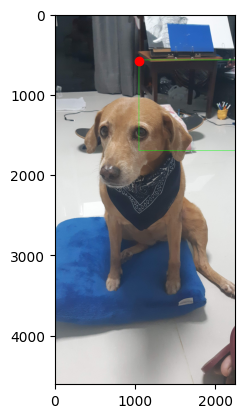

In [31]:
path = "../../images/guida2.jpg"
xmin, ymin, xmax, ymax = 1044, 571, 2657, 1700
altura, largura = 4608, 2240
# Exibir a imagem
fig, ax = plt.subplots(1)
image = cv2.imread(path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Desenhar o retângulo na imagem
color = (0, 255, 0)  # Cor do retângulo (no formato RGB)
thickness = 4  # Espessura da linha do retângulo
cv2.rectangle(image_rgb, (xmin, ymin), (xmax, ymax), color, thickness)
ax.plot(xmin, ymin, "ro")


ax.imshow(image_rgb)
plt.show()